### Author: Ethan Horrigan
### Description: This Notebook uses Convolutional Neural Networks (CNN) to classify handwritten digits as numbers 0 - 9

## Imports

In [1]:
# Matplotlib to plot copies of the Train Images
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import keras as kr
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Activation, Dense, Dropout, Flatten
# imports for array-handling and plotting
from keras.utils import np_utils

Using TensorFlow backend.


### Initially I was using a downloaded dataset & gzip to open the dataset, but I opted for the keras.datasets instead as this was more efficient
### This dataset is made up of images of handwritten digits, 28x28 pixels in size.
### load the MNIST dataset and split into (train & test sets) (Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.)
### returns:
### x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
### y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).

In [2]:
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()

### Viewing the Dataset

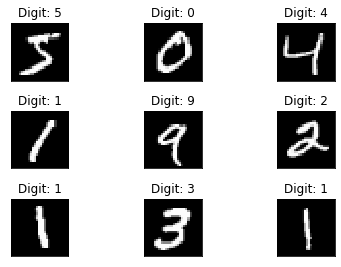

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [4]:
# To train the Neural Network to recognize images 
# I’ll make the Height by Width format into one vector (Input Vector) 
# Length = 28 x 28 = 784

### Viewing the Pixel Range from 0 - 255

Text(0.5, 1.0, 'Pixel Value Distribution')

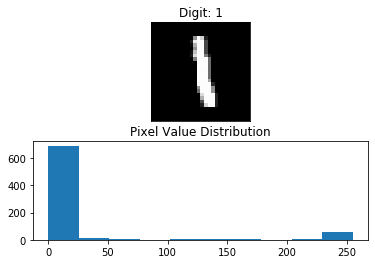

In [5]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[6], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(Y_train[6]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[6].reshape(784))
plt.title("Pixel Value Distribution")

#### Normalizing the input data will speed up the training.
#### It reduces the chance of getting stuck.
#### In order to achieve this, I will reshape the inputs into a single vector. 
#### Then I will Normalize the pixel values between (0,1).

In [6]:
# Build the input vector (from the 28x28 pixels)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# Convert to Floats to get decimal points
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [8]:
# one hot encode target values
# https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

#number_of_categories = this is the possible amount of outputs
number_of_categories = 10
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, number_of_categories)
Y_test = np_utils.to_categorical(Y_test, number_of_categories)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Building the Model
## The pixel vector I created earlier will serve as the input
## Followed by Two hidden 512 Hidden-Node Layers
## For classification, I'll add another fully-connected layer for the 10 possible output classes.
## For this Network I will use the Keras Sequential Model : https://keras.io/models/sequential/

In [9]:
# Declare the Model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 2:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3:
model.add(Dense(10))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
## Compiling the Model
## Optimizers: https://keras.io/optimizers/

## Optimzer options : Adam or Adadelta?
## Adam
## An algorithm for first-order gradient-based optimization of stochastic objective functions.
## The method is straightforward to implement, is computationally efficient, has little memory requirements, 
## Well suited for problems that are large in terms of data and/or parameters.

## Adadelta
## Per-dimension learning rate method for gradient descent.
## We show promising results compared to other 
## methods on the MNIST digit classification task using a single machine and on a large scale voice dataset in a distributed cluster environment.

# Which Optimizer?
## I chose Adam after reading this article: https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2
## - Adam learns the fastest.
## - Adam is more stable than the other optimizers, it doesn’t suffer any major decreases in accuracy.

In [11]:
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='Adadelta')
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer=kr.optimizers.Adam())

# Training the Model

In [12]:
# 1] Specify how many times to iterate on the whole training set (epochs) 
# 2] How many samples we use for one update to the model's weights (batch size). 
# Generally the bigger the batch, the more stable our stochastic gradient descent updates will be

# I will try 20 epochs to start.

In [13]:
 history = model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=2,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 11s - loss: 0.2471 - acc: 0.9256 - val_loss: 0.0996 - val_acc: 0.9691
Epoch 2/10
 - 9s - loss: 0.1023 - acc: 0.9688 - val_loss: 0.0799 - val_acc: 0.9756
Epoch 3/10
 - 9s - loss: 0.0726 - acc: 0.9775 - val_loss: 0.0788 - val_acc: 0.9759
Epoch 4/10
 - 9s - loss: 0.0547 - acc: 0.9825 - val_loss: 0.0696 - val_acc: 0.9775
Epoch 5/10
 - 9s - loss: 0.0460 - acc: 0.9845 - val_loss: 0.0654 - val_acc: 0.9792
Epoch 6/10
 - 9s - loss: 0.0396 - acc: 0.9871 - val_loss: 0.0661 - val_acc: 0.9809
Epoch 7/10
 - 9s - loss: 0.0343 - acc: 0.9880 - val_loss: 0.0625 - val_acc: 0.9820
Epoch 8/10
 - 9s - loss: 0.0297 - acc: 0.9900 - val_loss: 0.0695 - val_acc: 0.9818
Epoch 9/10
 - 8s - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0642 - val_acc: 0.9831
Epoch 10/10
 - 9s - loss: 0.0245 - acc: 0.9916 - val_loss: 0.0809 - val_acc: 0.9785


## Saving the Model

In [14]:
model.save("model.h5")

## Viewing the Accuracy

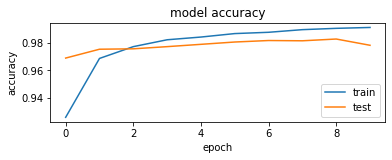

In [15]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Viewing the Loss

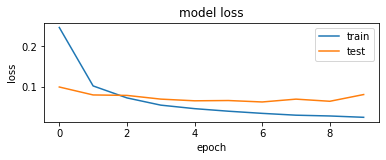

In [16]:
fig = plt.figure()
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')